In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display


In [2]:
# Load the dataset
stocks_data = pd.read_csv("stocks.csv") 

In [3]:
#Display the first few rows of the dataset
print(stocks_data.head()) 

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


The dataset contains the following columns for the stock market data: 
- Ticker: The stock ticker symbol.
- Date: The trading date.
- Open: The opening price of the stock of the day.
- High : The highest price of thestock during the day.
- Low : The lowest price of the stock during the day.
- Close: The closing price of the stock for the day.
- Adj close: The adjusted closing price, which accounts for all corporate actions such as dividends,stock splits,etc.
- Volume : The number of shares traded during the day.


To perform a comprehensive quantitative analysis, several statistical and financial techniques can be applied to the dataset. These include:

1. **Descriptive Statistics:** Summary statistics(mean,median,standard deviation,etc.) for each stock.

2. **Time Series Analysis:** Trends and patterns over time, especially for closing prices.

3. **Volatility Analysis:** How much the stock price flutuates over a period.

4. **Correlation Analysis:** How stock prices of different companies related to each other.

5. **Comparative Analysis:** Comapring the performance of different stocks.

6. **Risk-Return Trade-off Analysis:** Analyzing the balance between the potential risks and rewards of different stocks, aiding in portfolio management.

The following sections apply each concept of quantitative analysis to the stock market dataset in a structured, step-by-step manner.

## Descriptive Statistics

Descriptive Statistics will provide summary statitstics for each stock in the dataset. This step involves calculating metrics such as the mean, median, standard deviation, and other measures that describe the distribution and variability of stock prices.

By focusing on the Close prices, these statistics help in understanding the central tendency and dispersion of each stock’s performance over time. This forms the foundation for deeper financial insights such as volatility and risk analysis.

In [4]:
# Descriptive Statistics for each stock
descriptive_stats = stocks_data.groupby('Ticker')['Close'].describe()

print(descriptive_stats)

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  158.240645   7.360485  145.309998  152.077499  158.055000   
GOOG     62.0  100.631532   6.279464   89.349998   94.702501  102.759998   
MSFT     62.0  275.039839  17.676231  246.270004  258.742500  275.810013   
NFLX     62.0  327.614677  18.554419  292.760010  315.672493  325.600006   

               75%         max  
Ticker                          
AAPL    165.162506  173.570007  
GOOG    105.962503  109.459999  
MSFT    287.217506  310.649994  
NFLX    338.899994  366.829987  


A break down for the rults in each stock:

**AAPL(APPLE INC)**

- **Count:** 62.0 ( The number of observations or trading days included in the dataaset for AAPL)
- **Mean:** 158.24(The average closing price)
- **Standard Deviation:** 7.36(Measures the amount of variation or dispersion of closing prices)
- **Minimum:** 145.31(The lowest closing price in the dataset)
- **25th Percentile:** 152.08(25% of the closing prices are below this value)
- **Median(50%):** 158.06(The middle value of the closing prices) 
- **75th Percentile:** 165.16(75% of the closing prices are below this value)
- **Maximum:** 173.57(The biggest closing price in the dataset)

 **GOOG (Alphabet Inc.)**

Similar statistics as AAPL, but for GOOG. The mean closing price is 100.63, with a standard deviation of 6.28, indicating less variability in closing prices compared to AAPL.

**MSFT (Microsoft Corporation)**

The dataset includes the same number of observations for MSFT. It has a higher mean closing price of 275.04 and a higher standard deviation of 17.68, suggesting greater price variability than AAPL and GOOG.

**NFLX (Netflix Inc.)**

NFLX shows the highest mean closing price (327.61) among these stocks and the highest standard deviation (18.55), indicating the most significant price fluctuation.

## Time Series Analysis
This is to examine trends and patterns over time, focusing on the closing prices:

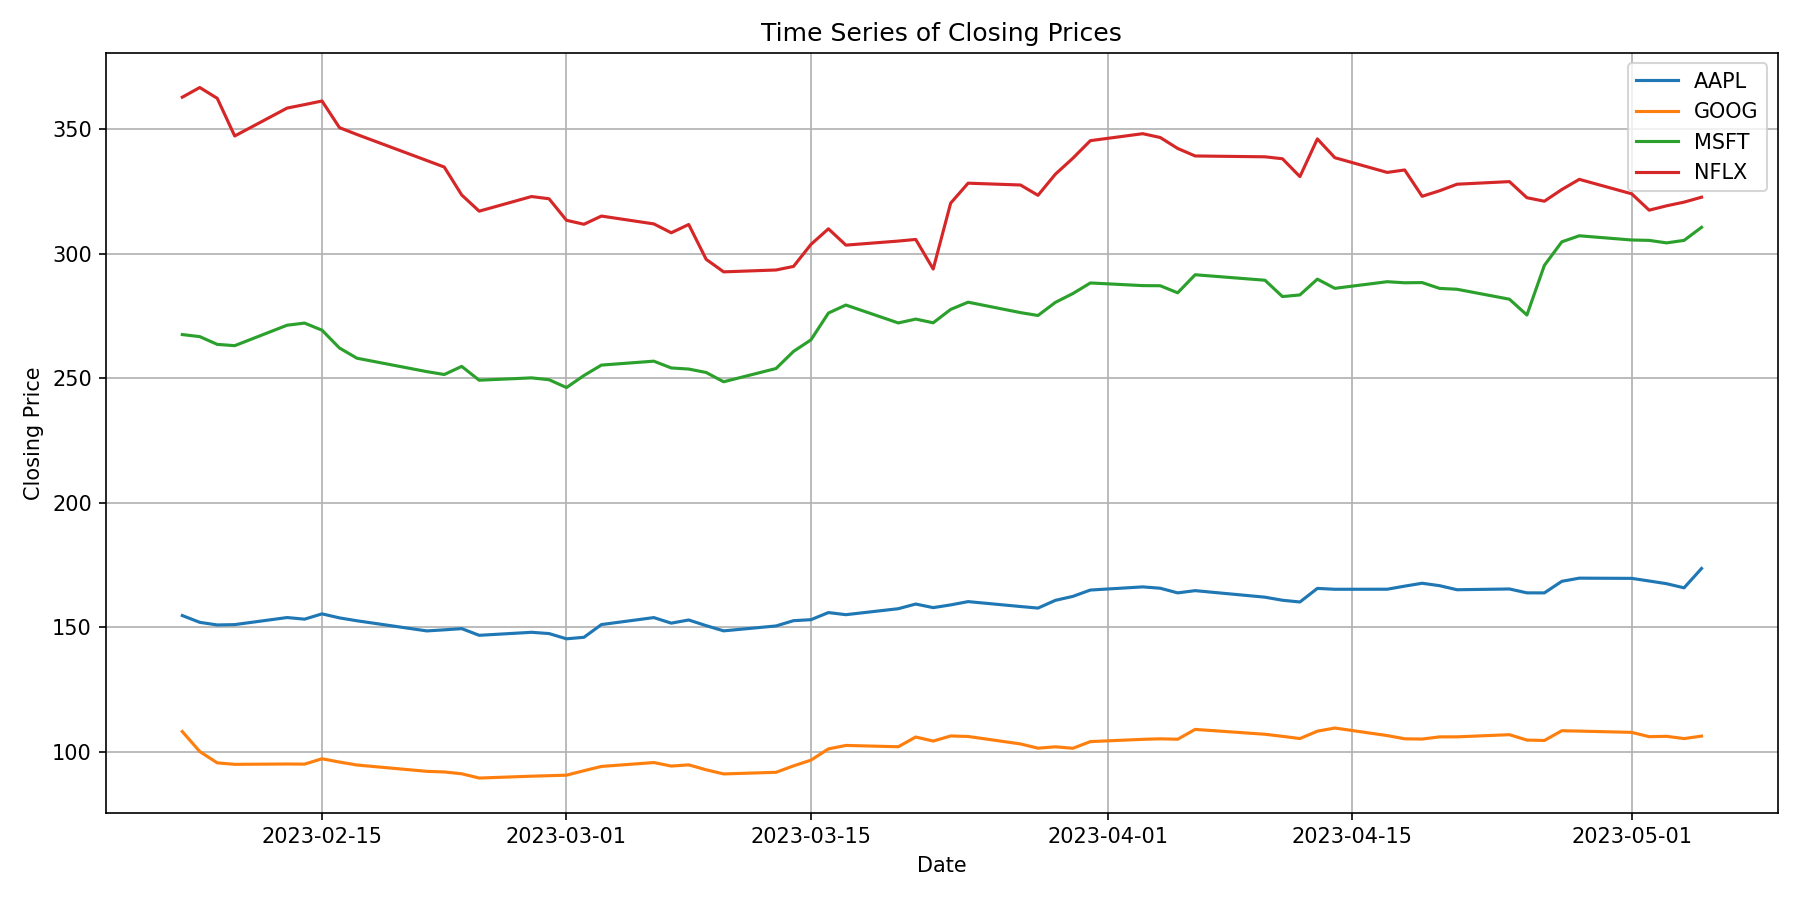

In [7]:
# Time Series Analysis
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
if 'pivot_data' not in globals():
    pivot_data = stocks_data.pivot_table(index='Date', columns='Ticker', values='Close').sort_index()

plt.figure(figsize=(12,6))
for col in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[col], label=col)
plt.title('Time Series of Closing Prices')
plt.xlabel('Date'); plt.ylabel('Closing Price')
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.savefig("time_series_matplotlib.png", dpi=150)
display(Image("time_series_matplotlib.png"))
plt.close()

The above plot displays the time series of the closing prices for each stock(AAPL, GOOG, MSFT, NFLX) over the observed period. Here are some key observations:

1. **Trend:** Each stock shows its unique trend over time.For instance, AAPL and MSFT exhibit a genera; upward trend in this period.

2. **Volatility:** There is a noteable volatilty in the stock prices. For example, NFLX shows more pronounced fluctuatuions comapred to others.

3. **Comparative Performance:** When comparing the stocks, MSFT and NFLX generally trade at higher price levels than AAPL and GGOG in this dataset.


## Volatility Analysis

The next step focuses on volatility analysis, which involves calculating and comparing the volatility(standard deviation) of the closing prices for each stock. This measure provides insight into the degree of price fluctuation experienced by each stock over the observed period.

In [6]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

# Show The figure
fig.show() 

The bar chart  and the accompanying data show  the volatility(measured as stsndard deviation) of the closing prices for each stock. Here is how they rank in terms of volstility:

1. **NFLX:** Highest volatilty with a standard deviation of approximate;y 18.55.
2. **MSFT:** Next highest with a standard deviation of around 17.68.
3. **AAPL:** Lower volatility compared to NFLX and MSFT, with a standard deviation of about 7.36.
4. **GOOG:** The least volatile in this set, witha standard deviation of approximately 6.28.

It indicates that NFLX and MSFT stocks were most prone to price fluctuations during this period compared to AAPL and GOOG. 

## Correlation Analysis
The next step is to perform a Correlation Analysis to understand how the stock prices of these companies are related to each other:

In [7]:
#Corelation Analysis
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='blues',
    colorbar=dict(title='Correaltion'), 
))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

# Show the figure
fig.show()



The heatmap above dispalys the correlation matrix of the closing prices of the four stocks(AAPL, GOOGL, MSFT NFLX).
Here is what the correlation coeffiecients suggest:

- Values close to +1 indicate a strong positive correlation, meanining that as one stock's price increases, the other tends to increase as well.
- Values close to -1 indicate a strong negative correlation,where one stock's price increase corresponds to a decrease in the other.
-Values around 0 indicate a lack of corrrrelation.

From the heatmap,